Taken from: http://onlinestatbook.com/2/regression/regression_exercises.html

Using linear regression, find the predicted post-test score for someone with a score of 43 on the pre-test.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dtf = pd.read_csv('ex10.csv')

'Seems we have an outier'

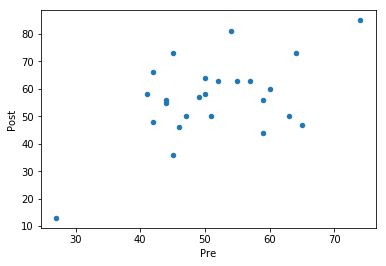

In [3]:
dtf.plot.scatter(x='Pre', y='Post')
'''Seems we have an outier'''

In [4]:
print(dtf[dtf.Pre < 30])
'''Outlier is row at index = 8'''

   Pre  Post
8   27    13


'Outlier is row at index = 8'

'I dont think this data has a linear relationship'

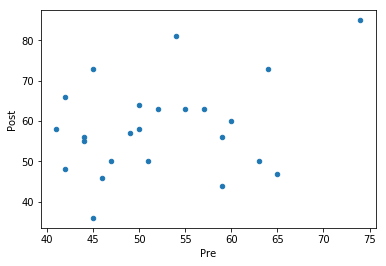

In [5]:
'''Removing outlier'''
clean_dtf = dtf.drop([8])

'''Plotting again'''
clean_dtf.plot.scatter(x='Pre', y='Post')

'''I dont think this data has a linear relationship'''

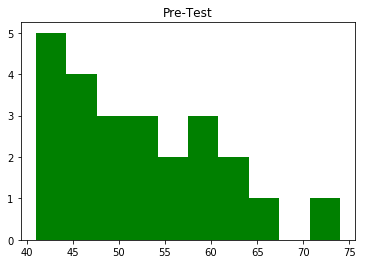

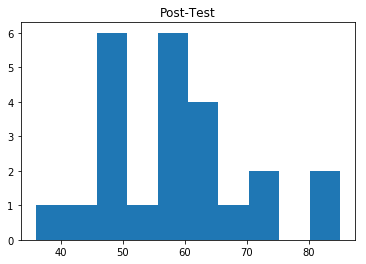

' Pre-Test is not normaly distributed '

In [6]:
''' Its this data Normal?'''
plt.hist(clean_dtf.Pre, color='g')
plt.title('Pre-Test')
plt.show()

plt.hist(clean_dtf.Post)
plt.title('Post-Test')
plt.show()

''' Pre-Test is not normaly distributed '''

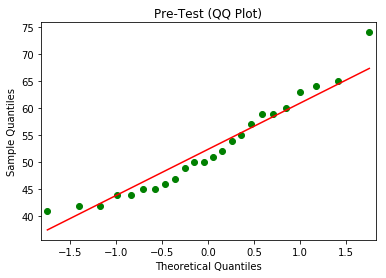

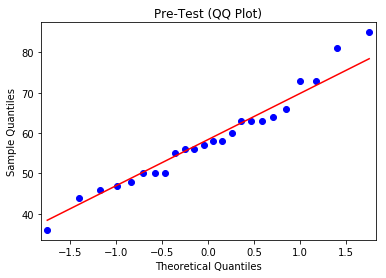

' QQ-Plots also show that Pre-Test is not normaly distributed '

In [7]:
from statsmodels.graphics.gofplots import qqplot

qqplot(clean_dtf.Pre, line='s', color='g')
plt.title('Pre-Test (QQ Plot)')
plt.show()

qqplot(clean_dtf.Post, line='s')
plt.title('Pre-Test (QQ Plot)')
plt.show()

''' QQ-Plots also show that Pre-Test is not normaly distributed '''

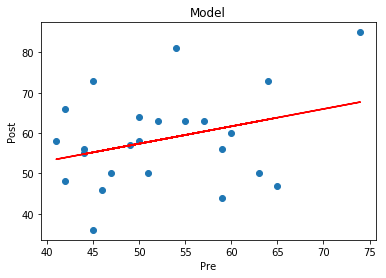

R^2: 0.1027147508388746


' We can not get a good Simple Linear Model from this data '

In [8]:
'''Lets give it a go anyways'''
from sklearn import linear_model

X = clean_dtf.Pre.values.reshape(-1, 1)
y = clean_dtf.Post

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_pred = lm.predict(X)

plt.scatter(X, y)
plt.xlabel('Pre')
plt.ylabel('Post')
plt.plot(X, y_pred, color='r')
plt.title('Model')
plt.show()

print('R^2:', lm.score(X,y))
''' We can not get a good Simple Linear Model from this data '''

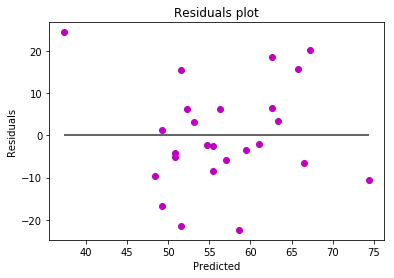

' Not impressed by the residuals plot. Can not assert they are equally distributed around zero. http://statisticsbyjim.com/regression/heteroscedasticity-regression \n\nHeteroscedasticity means unequal scatter. In regression analysis, we talk about heteroscedasticity in the context of the residuals or error term. Specifically, heteroscedasticity is a systematic change in the spread of the residuals over the range of measured values. Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity).\n'

In [17]:
plt.scatter(y_pred, (y_pred - y), color='m')
plt.hlines(0, min(y_pred), max(y_pred), color='black', alpha=.8)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.show()
''' Not impressed by the residuals plot. Can not assert they are equally distributed around zero. http://statisticsbyjim.com/regression/heteroscedasticity-regression 


Heteroscedasticity means unequal scatter. In regression analysis, we talk about heteroscedasticity in the context of the residuals or error term. Specifically, heteroscedasticity is a systematic change in the spread of the residuals over the range of measured values. Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity).
'''

In [10]:
'''(...) predicted post-test score for someone with a score of 43 on the pre-test'''
print('Predicted Post:', lm.predict([[43]]))

Predicted Post: [54.36368426]


In [11]:
'''Use original data, including outlier'''
X = dtf.Pre.values.reshape(-1, 1)
y = dtf.Post

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_pred = lm.predict(X)

print('R^2:', model.score(X,y))
print('Predicted Post:', lm.predict([[43]]))

R^2: 0.28550355673892736
Predicted Post: [49.99033898]


### Let's try scaling (to normalize) Pre-test data

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


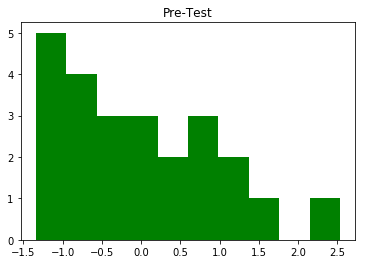

' Neh, that did not work '

In [12]:
from sklearn import preprocessing

Pre_scaled = preprocessing.scale(clean_dtf.Pre.values.reshape(-1, 1))
plt.hist(Pre_scaled.reshape(1, -1)[0], color='g')
plt.title('Pre-Test')
plt.show()
''' Neh, that did not work '''

### Let's use a more poweful transformation with coxbox

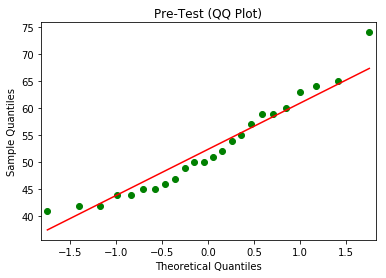

' Meh, nevermind normalizing this data'

In [13]:
from scipy.stats import boxcox
from numpy import exp

data = exp(clean_dtf.Pre.values)
data = boxcox(data, 0)

qqplot(data, line='s', color='g')
plt.title('Pre-Test (QQ Plot)')
plt.show()

''' Meh, nevermind normalizing this data'''